In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
dfHolidays=pd.read_csv(path+f"\\holidays.csv")
data=pd.read_pickle(Y_path)
iOoS=28

In [ ]:
weight_type = "diag"
# mX  = get_mX(X_path)

## Forecast Prophet using default params

In [ ]:
tree=Tree( data =data , type='spatial') 
tree.forecast_Prophet(iOoS=28 , dfHolidays=dfHolidays, ddParams=None)

c:\Users\31683\Desktop\M5-1\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


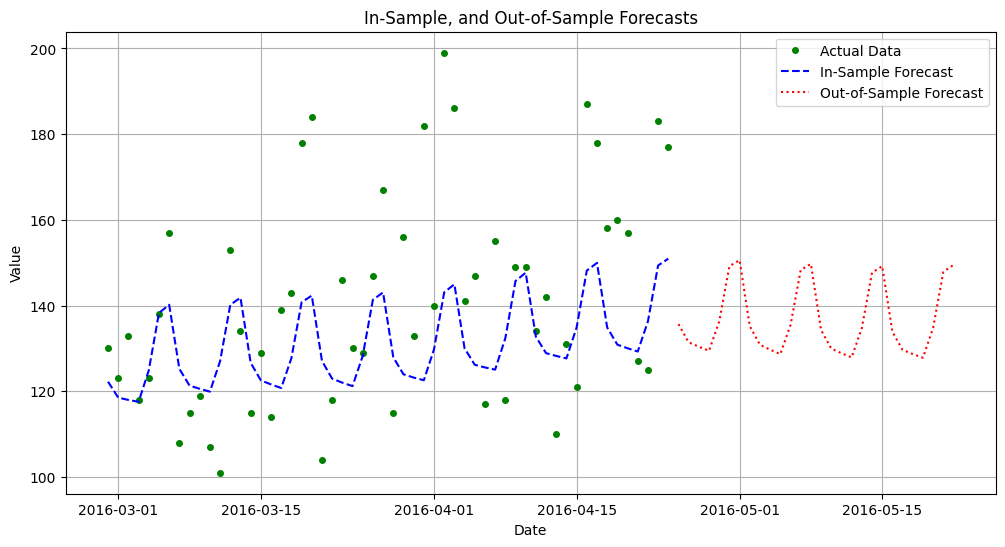

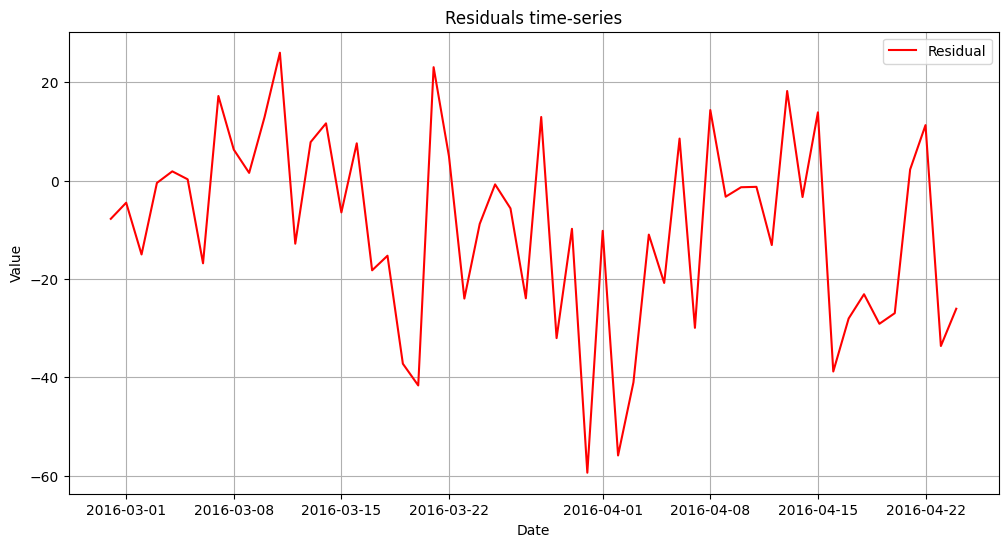

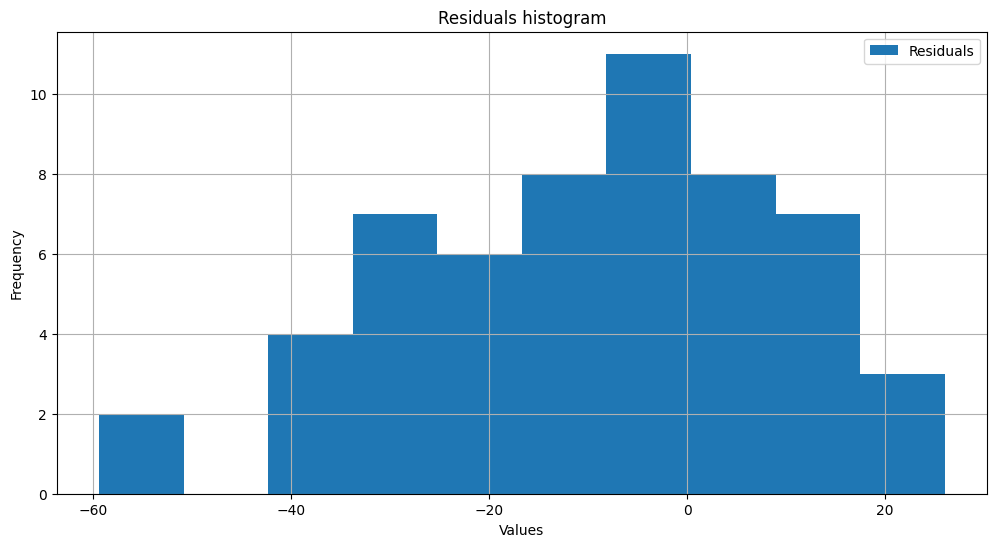

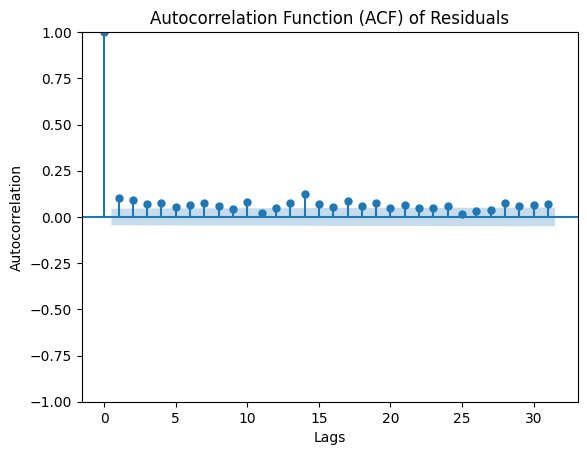

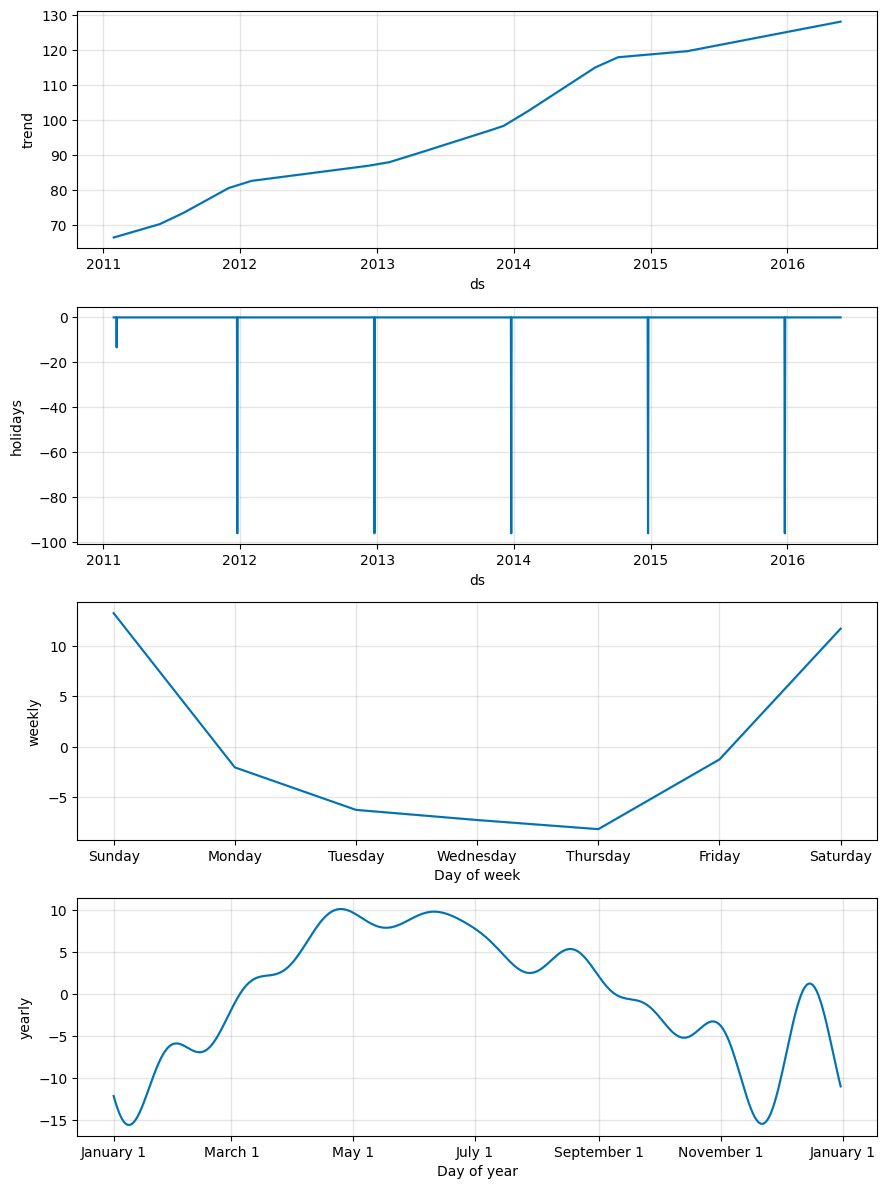

In [ ]:
tree.dForecasters[0].plot_prediction(inSample=False)

## Forecast Prophet using tuned params

In [14]:
with open(os.getcwd()+'\\data\\M5\\ddParams_20241007_232407.pkl', 'rb') as file:
    ddParams  = pickle.load(file) 


tree_tuned=Tree( data_directory = Y_path , type='spatial') 
tree_tuned.forecast_Prophet(iOoS=28 , dfHolidays=dfHolidays, ddParams=ddParams)

c:\Users\31683\Desktop\M5-1\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


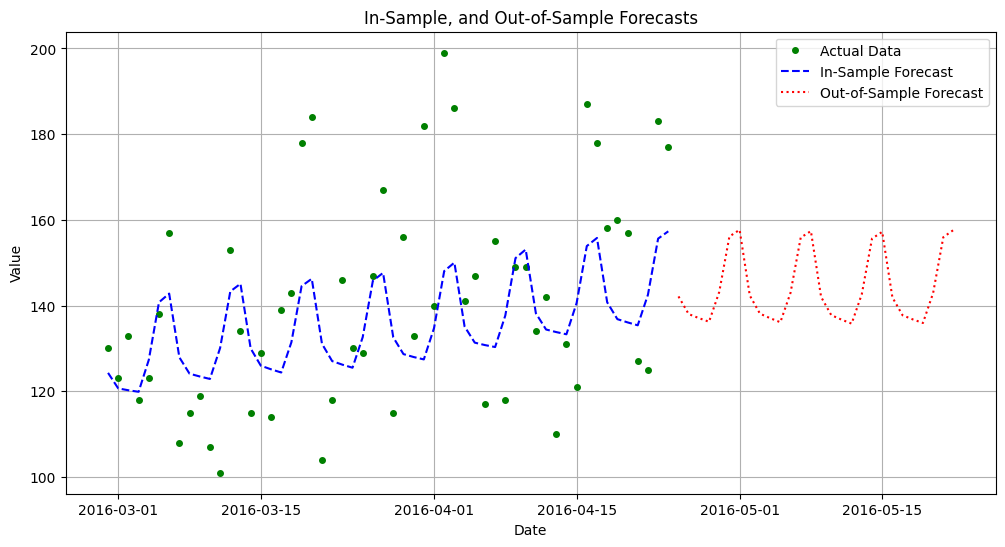

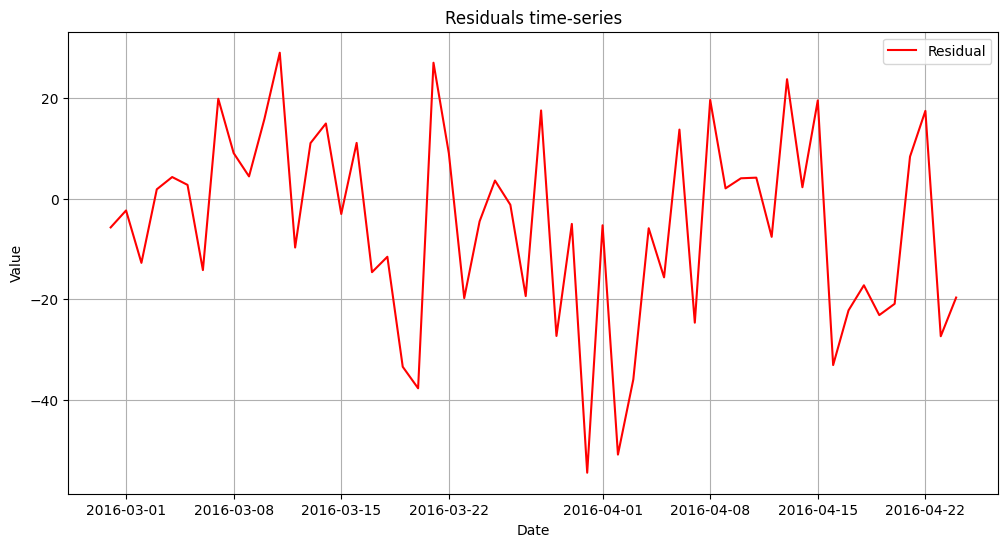

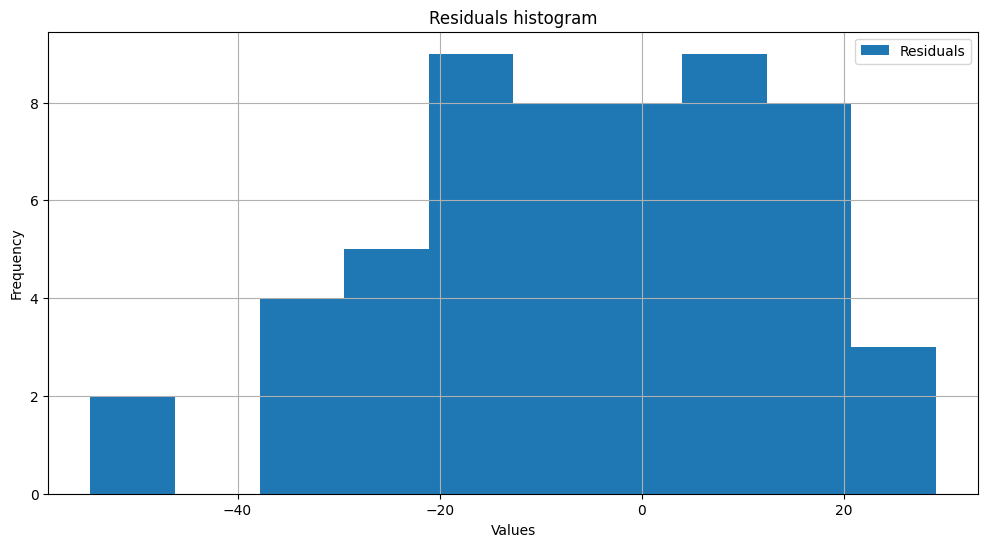

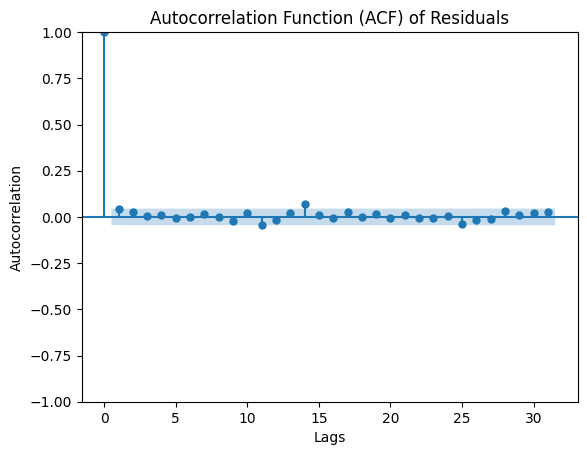

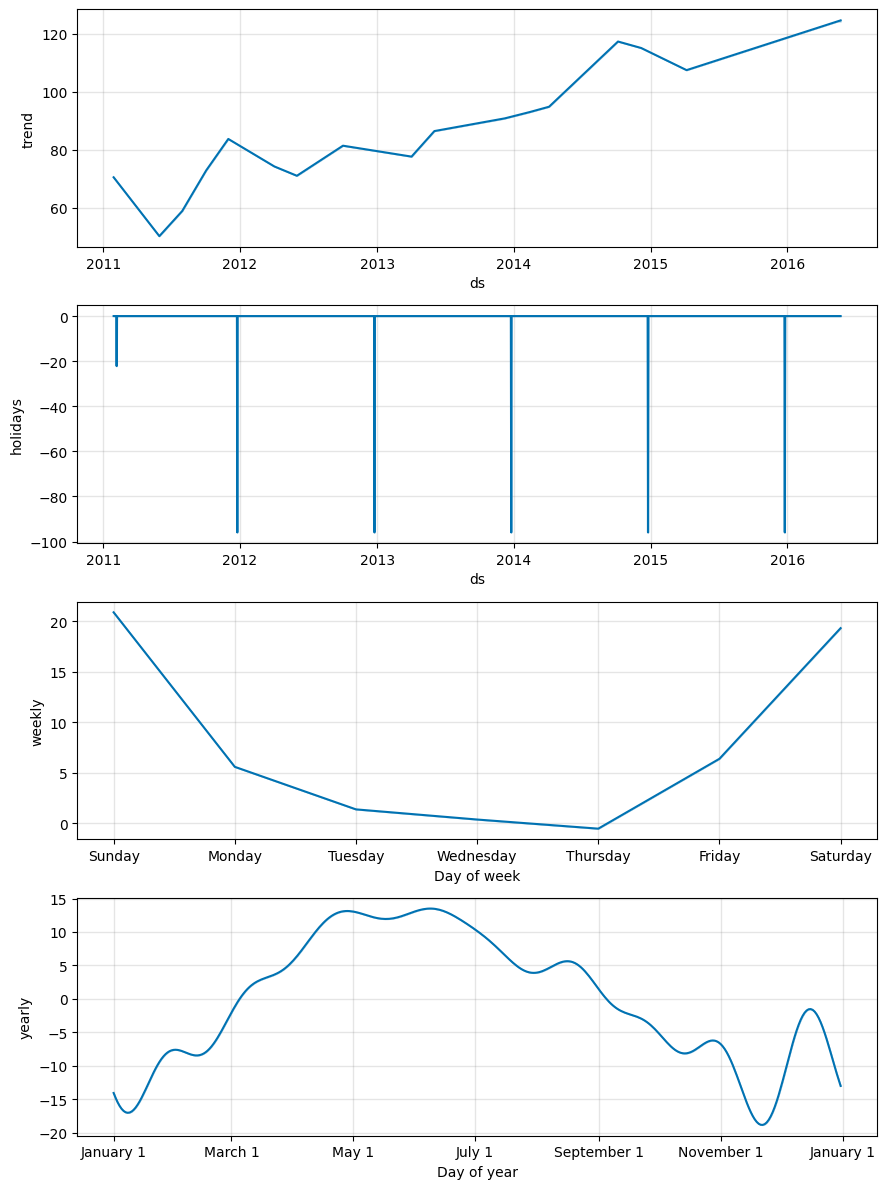

In [19]:
tree_tuned.dForecasters[71].plot_prediction(inSample=False)

## Forecast Prophet using Price

In [ ]:
Y_path=os.getcwd()+f"\\data\\M5\\sales_train_validation.csv"  # to data file 
X_path=os.getcwd()+f"\\data\\M5\\prices_train_val_eval.csv"  # to data file
iOoS=28 
weight_type = "diag"
mX  = get_mX(X_path)
dfHolidays=pd.read_csv(os.getcwd()+f"\\data\\M5\\holidays.csv")

In [163]:
i=0

dfY = pd.DataFrame(data=tree.mY[i] , index=tree.date_time_index , columns=['y'])
dfX = pd.DataFrame(data=mX[:,:-iOoS][i] , index=tree.date_time_index.append(pd.date_range(start=tree.date_time_index[-1] + pd.Timedelta(days=1),
                                                                                                periods=iOoS, freq='D')) , 
                                   columns=['price'])
changepoints=None
params=None

In [93]:
dfY

,y
2011-01-29,16.00
2011-01-30,16.00
2011-01-31,16.00
2011-02-01,6.00
2011-02-02,13.00
...,...
2016-04-20,41.00
2016-04-21,39.00
2016-04-22,60.00
2016-04-23,37.00


In [94]:
dfX

,price
2011-01-29,2.54
2011-01-30,2.54
2011-01-31,2.54
2011-02-01,2.54
2011-02-02,2.54
...,...
2016-05-18,2.58
2016-05-19,2.58
2016-05-20,2.58
2016-05-21,2.58


In [170]:
params={"changepoint_prior_scale" :  0.05 
        ,"seasonality_prior_scale" : 10
        , "holidays_prior_scale" :  10 
        ,"seasonality_mode" :  'multiplicative'  #LOOK at the data
        ,"weekly_seasonality" :  7 } 
pht = Forecast_Prophet(dfData=dfY, 
                        dfX=dfX,
                        holidays=holidays,
                        changepoints=changepoints,
                        params = params)

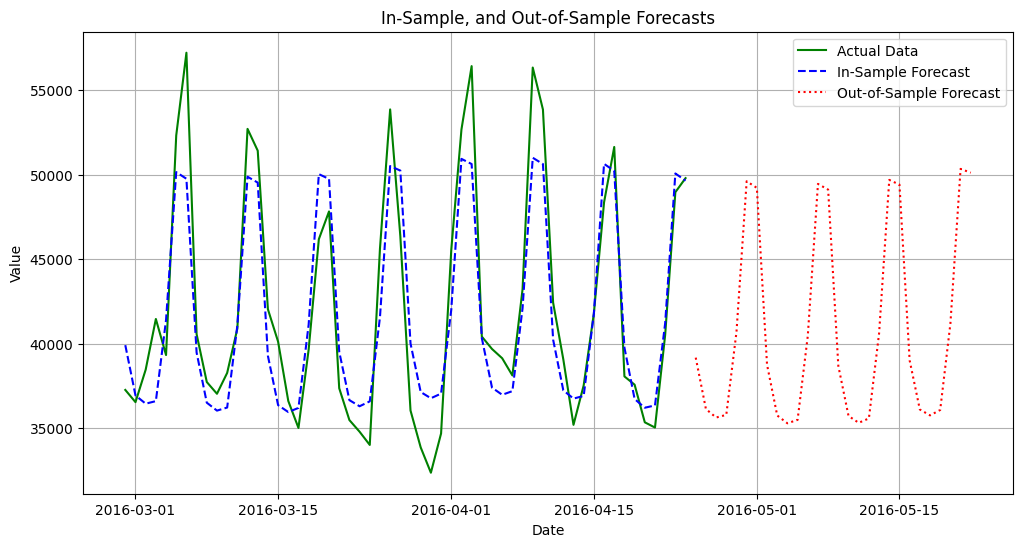

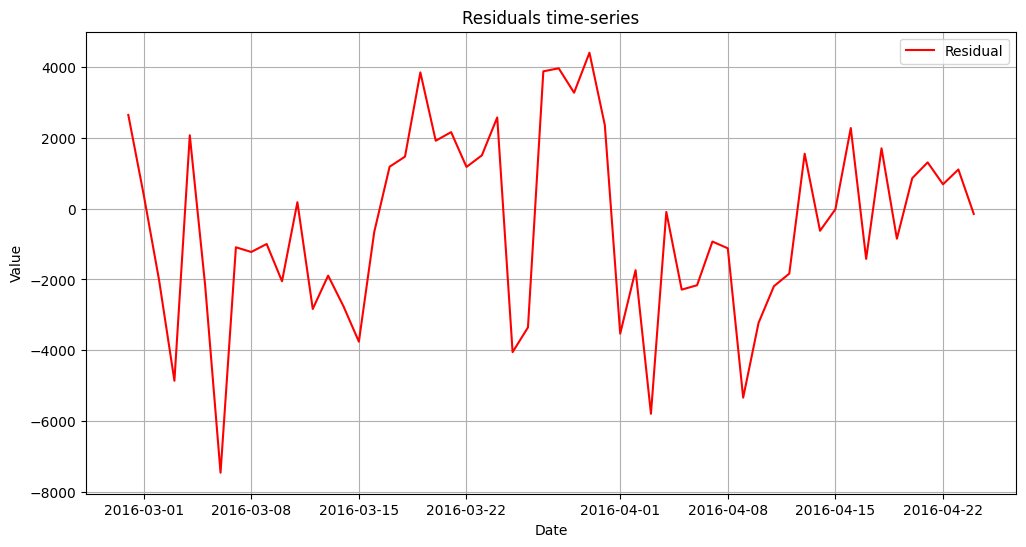

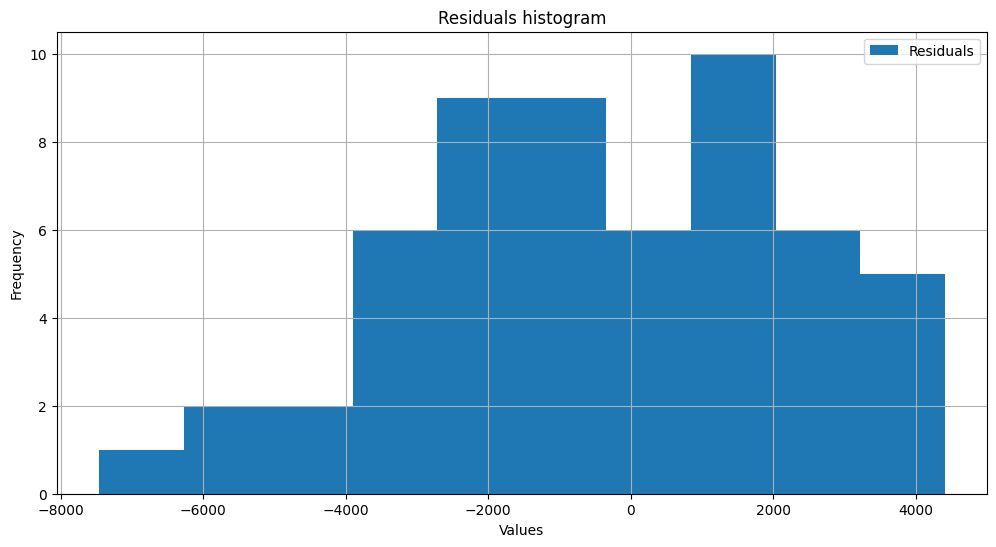

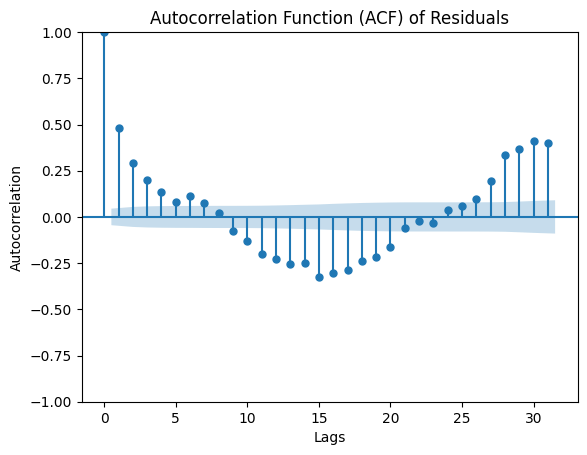

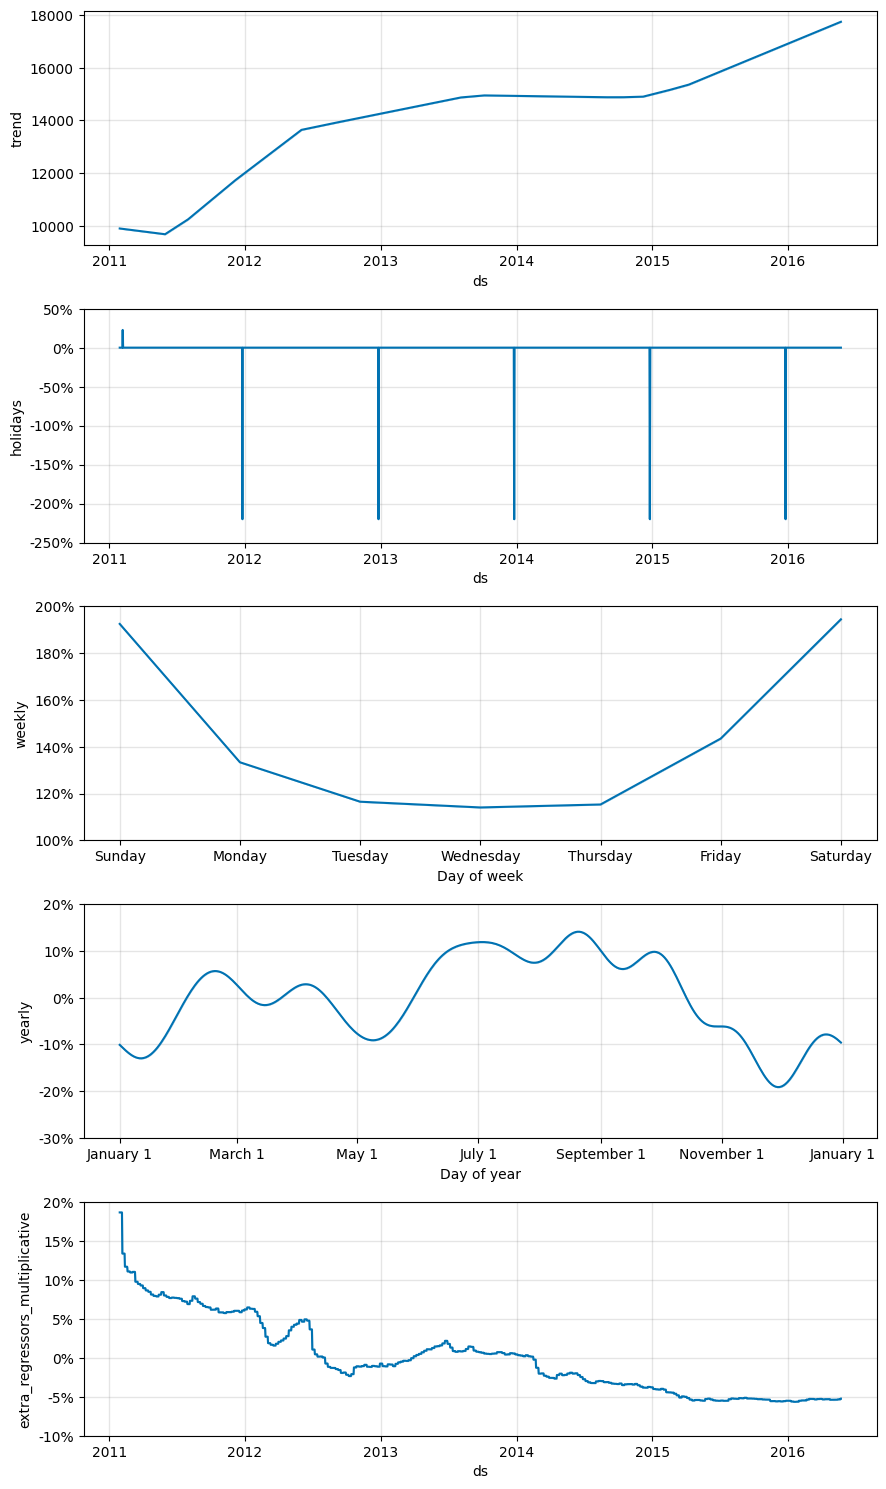

In [171]:
pht.forecast(iOoS)
pht.plot_prediction(inSample=False)

In [174]:
pht.dfModel

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,1,1_lower,1_upper,Christmas,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-29,9891.45,26830.86,34166.67,9891.45,9891.45,0.00,0.00,0.00,0.00,...,1.94,1.94,1.94,-0.05,-0.05,-0.05,0.00,0.00,0.00,30490.18
1,2011-01-30,9889.65,26880.79,33920.15,9889.65,9889.65,0.00,0.00,0.00,0.00,...,1.92,1.92,1.92,-0.04,-0.04,-0.04,0.00,0.00,0.00,30367.84
2,2011-01-31,9887.86,20857.78,28190.91,9887.86,9887.86,0.00,0.00,0.00,0.00,...,1.33,1.33,1.33,-0.03,-0.03,-0.03,0.00,0.00,0.00,24591.41
3,2011-02-01,9886.07,19337.50,27000.88,9886.07,9886.07,0.00,0.00,0.00,0.00,...,1.16,1.16,1.16,-0.03,-0.03,-0.03,0.00,0.00,0.00,22997.03
4,2011-02-02,9884.28,18952.93,26335.64,9884.28,9884.28,0.00,0.00,0.00,0.00,...,1.14,1.14,1.14,-0.02,-0.02,-0.02,0.00,0.00,0.00,22825.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,17723.77,32040.64,39346.93,17721.87,17728.52,0.00,0.00,0.00,0.00,...,1.14,1.14,1.14,-0.07,-0.07,-0.07,0.00,0.00,0.00,35754.18
1937,2016-05-19,17729.61,32482.17,39888.31,17727.05,17735.35,0.00,0.00,0.00,0.00,...,1.15,1.15,1.15,-0.07,-0.07,-0.07,0.00,0.00,0.00,36073.50
1938,2016-05-20,17735.45,37443.65,44822.39,17731.69,17741.73,0.00,0.00,0.00,0.00,...,1.43,1.43,1.43,-0.06,-0.06,-0.06,0.00,0.00,0.00,41172.40
1939,2016-05-21,17741.29,46638.87,54057.97,17737.04,17748.42,0.00,0.00,0.00,0.00,...,1.94,1.94,1.94,-0.05,-0.05,-0.05,0.00,0.00,0.00,50343.40


Tuning has began


Tuning Progress: 100%|██████████| 71/71 [11:34<00:00,  9.78s/it]


Tuning has been terminated succesfully


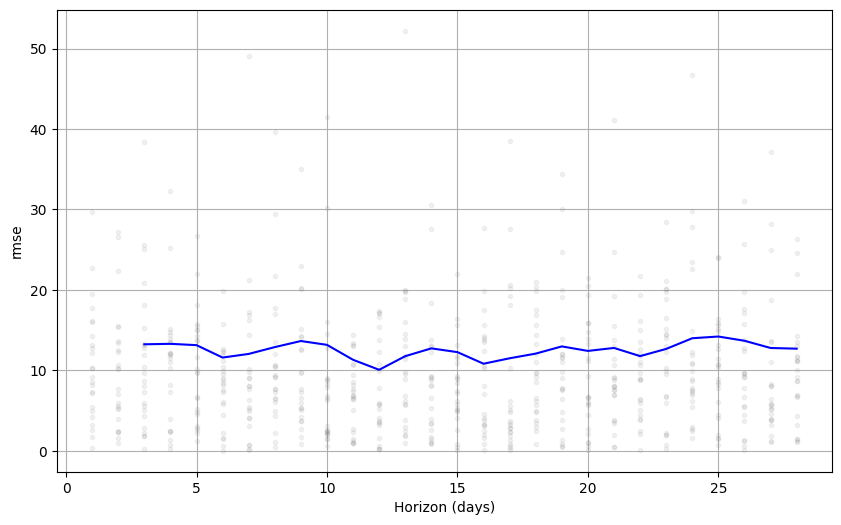

In [104]:
pht.tune(70,initial=700,period=50,horizon=28, metric='rmse', plot=False)